# "Titanic ML competition"

### _"Predicting survival of passengers based on sorts of people" (Binary classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 11 columns and 418 entries of data about passengers destiny  based on sorts of people ebarked on Titanic.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


**Метаданные:**
    
* **Pclass** - A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
 
* **Name** - Name of passenger

* **Sex** - Gender of passanger

* **Age** - Age of passenger

* **SibSp** - The dataset defines family relations in this way:Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
* **Parch** - The dataset defines family relations in this way:
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
* **Ticket** - Ticket number
* **Fare** - Passenger fare
* **Cabin** - Cabin number
* **embarked** - Port of Embarkation
* **Id** - passenger id






### Questions:
    

to predict if a passenger survived the sinking of the Titanic or not (check balance of classes; calculate perdictions)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Rename Columns
* ### Columns visualisation
* ### 'gender' attribute value counts 
* ### Encode the Data

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate model 
    * #### Logistic Regression
    * #### Visualisation of predictions
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)


## Part 1: Import, Load Data.

* ### Import libraries

In [339]:
# import standard libraries

# import standard libraries

import numpy as np 
import pandas as pd
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [340]:
#create settings
min_value_corr = 0.4

* ### Read data from ‘.csv’ file

In [341]:
#read file
#with open('train.csv') as my_new_file:
   # contents = my_new_file.read()

In [342]:
# read data from '.csv' file
df = pd.read_csv('train.csv')
tr = pd.read_csv('test.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [343]:
# print the full summary of the dataset  
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dataset consists of 891 rows and 12 columns;

has 3 datatypes: object(5);int64(5), float64(2)

has  missing values.

In [344]:
#List of numerical and Categorical features

In [345]:
#check for Numerical features in df
numerical_feats_df = df.dtypes[df.dtypes != 'object'].index
print('Quantity of Numerical features: ', len(numerical_feats_df))
print()
print (df[numerical_feats_df].columns)
print()
categorical_feats_df = df.dtypes[df.dtypes == 'object'].index
print('Quantity of Categorical features: ', len(categorical_feats_df))
print()
print (df[categorical_feats_df].columns)

Quantity of Numerical features:  7

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Quantity of Categorical features:  5

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


* ### Head

In [346]:
# preview of the first 5 lines of the loaded data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* ### Columns visualisation

* ### 'survived' attribute value counts 

In [347]:
# 'survived' value counts 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There are 342 of 'Survived' and 549 of 'Not survived' in our dataset. This means that our dataset is balanced.

In [348]:
# present "0" and "1 in %
print('0 (Not survived):', round(df['Survived'].value_counts()[0] / len(df) * 100, 2), '% of the dataset' )
print('1 (Survived):', round(df['Survived'].value_counts()[1] / len(df) * 100, 2), '% of the dataset' )

0 (Not survived): 61.62 % of the dataset
1 (Survived): 38.38 % of the dataset


Text(0.5, 1.0, 'Class Distributions (0||1)')

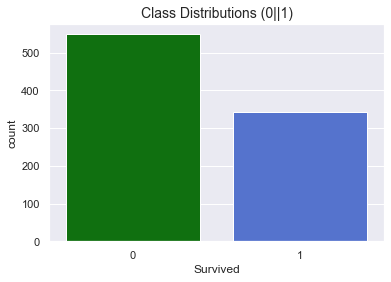

In [349]:
#visualisation of "0 and "1" states
colors = ["green", "royalblue"]
sns.countplot('Survived', data = df, palette = colors)
plt.title('Class Distributions (0||1)', fontsize =14)

* ### Encode the Data

In [350]:
# label encoding

le_sex = LabelEncoder()
data = df
data['Sex'] = le_sex.fit_transform(df.Sex.values)
le_cabin = LabelEncoder()
data['Cabin'] = le_cabin.fit_transform(df.Cabin.values)
le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(df.Embarked.values)
data.head()
le_trsex = LabelEncoder()
trdata = tr
trdata['Sex'] = le_trsex.fit_transform(tr.Sex.values)
le_trcabin = LabelEncoder()
trdata['Cabin'] = le_trcabin.fit_transform(tr.Cabin.values)
le_trembarked = LabelEncoder()
trdata['Embarked'] = le_trembarked.fit_transform(tr.Embarked.values)
trdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,2


In [351]:
# set 'ID' to index
data = data.set_index('PassengerId')

data.head()
data.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    1  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
3                                       Heikkinen, Miss. Laina    0  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
5                                     Allen, Mr. William Henry    1  35.0   

In [352]:
#corellation Num features to the target
corr = df.corr()
corr_abs = corr.abs()

num_cols = len(numerical_feats_df)
num_corr = corr_abs.nlargest(num_cols, 'Survived')['Survived']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)
                                                    

In [353]:
#list of Numerical features and their correlation coefficient to target
print(num_corr)
print()
print('Numerical features with correlation above min value :')
print(cols_abv_corr_limit)
print()
print('Numerical features with correlation below min value: ')
print(cols_blw_corr_limit)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Cabin       0.254888
Embarked    0.163517
Parch       0.081629
Name: Survived, dtype: float64

Numerical features with correlation above min value :
['Survived', 'Sex']

Numerical features with correlation below min value: 
['Pclass', 'Fare', 'Cabin', 'Embarked', 'Parch']


In [263]:
#set ID to index in Test data
trdata = trdata.set_index('PassengerId')

In [264]:
trdata.info()
trdata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int32  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     418 non-null    int32  
 9   Embarked  418 non-null    int32  
dtypes: float64(2), int32(3), int64(3), object(2)
memory usage: 31.0+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,2


# Observation of target variable

In [265]:
# target variable
data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

* ## Missing values

In [266]:
# check the Train features with missing values 
nan_columns = [i for i in data.columns if data[i].isnull().any()]
print(data.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

There are 1 columns with NAN values for 50 rows.


['Age']

In [267]:
# check the Test features with missing values
nan_columns = [i for i in tr.columns if tr[i].isnull().any()]
print(trdata.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64

There are 2 columns with NAN values for 50 rows.


['Age', 'Fare']

## Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

*'Age': Numerical - replacement of NAN by 'mean';
*'Fare': Numerical - replacement of NAN by 'mean';
*'Cabin': Numerical - replacement of NAN by 'None'.

In [269]:
 # Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'Age',
    'Fare',
       ]

# replace 'NAN' with 'mean' in these columns
data.fillna(data.mean(), inplace = True)  
trdata.fillna(trdata.mean(), inplace = True)

na_columns_fill = [
    'Cabin'
    ]
# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    trdata[col].fillna('None', inplace=True)

In [270]:
# check is there any mising values left in Train
data.isnull().sum().sum()

0

In [271]:
# check is there any mising values left in Test
trdata.isnull().sum().sum()

0

In [291]:
#initsialisation of target

target = data['Survived'] 

# Standard scaler

In [298]:
sc = StandardScaler()
dataset_sc = sc.fit_transform(data)

dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()
data = dataset_sc
data.head()

,0,1,2,3,4,5,6,7,8
0,-0.789272,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.451502,0.581114
1,1.266990,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.381627,-1.938460
2,1.266990,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.451502,0.581114
3,1.266990,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,-2.103768,0.581114
4,-0.789272,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.451502,0.581114


## Part 3: Data Wrangling and Transformation.

In [296]:
# Drop target variable 
#train = train.drop(columns=['Profit'])

In [297]:
# Drop unnecessary variables 
data = data.drop(columns=['Ticket'])
data = data.drop(columns=['Name'])
trdata = trdata.drop(columns=['Ticket'])
trdata = trdata.drop(columns=['Name'])
#trdata = trdata.drop(columns=['Ticket','Name'])

KeyError: "['Ticket'] not found in axis"

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
 6   6       891 non-null    float64
 7   7       891 non-null    float64
 8   8       891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [300]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int32  
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 24.5 KB


* ### Creating datasets for ML part

In [301]:
# set 'X' for features' and y' for the target ('survived').
y = data['Survived']
X = data.drop(['Survived'],axis=1)

KeyError: 'Survived'

* ### 'Train\Test' split

In [302]:
# 'Train\Test' splitting method
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

## Part 4: Machine Learning.

* ### Build, train and evaluate model

### Logistic Regression

In [303]:
# Logistic Regression model
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [304]:
# LR predictions
LR_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

* ### Visualisation of predictions

In [305]:
# visual comparison between Actual 'Survived' and Predicted 'Survived'
actualvspredicted = pd.DataFrame({"Actual Survived":y_test,"LR Predicted Survaval":LR_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Survived,LR Predicted Survaval
PassengerId,,
496,0,0
649,0,0
279,0,0
32,1,1
256,1,1
299,1,0
610,1,1
319,1,1
485,1,1


* ### Classification report

In [307]:
# classification report of LR model
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.836257  0.851190  0.843658       168
           1   0.742268  0.720000  0.730964       100

    accuracy                       0.802239       268
   macro avg   0.789263  0.785595  0.787311       268
weighted avg   0.801187  0.802239  0.801608       268



* ### Confusion matrix

LR Confusion Matrix


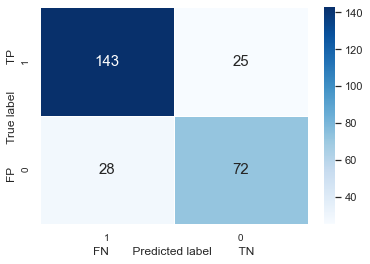

In [308]:
# confusion matrix of LR model
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print('LR Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [309]:
# ROC-AUC score of LR model
roc_auc_score(LR_pred, y_test)

0.789262675589317

In [310]:

# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['Survived'] = LR_pred
sub.to_csv('survivalpredictions.csv', index=False)

Вопросы:
* проверка на тестовых данных ++
* почему рок-аук такой плохой don't know
* как можно улучшить аккураси hyperparameters?
* как можно посмотреть главный атрибут

In [311]:
#prediction
LR_pred_new = LR.predict(trdata)

In [312]:
LR_pred_new

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['PassengerId'] = trdata.index
sub['Survived'] = LR_pred_new
sub.to_csv('1_survivalpredictions.csv', index=False)

##  Conclusion.

In [313]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

In [314]:
# ROC-AUC score of KNN model
roc_auc_score(LR_pred, y_test)
# classification report of KNN model
print("LR Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.760870  0.833333  0.795455       168
           1   0.666667  0.560000  0.608696       100

    accuracy                       0.731343       268
   macro avg   0.713768  0.696667  0.702075       268
weighted avg   0.725719  0.731343  0.725768       268



KNN Confusion Matrix


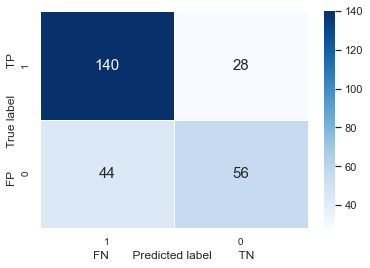

In [315]:
# confusion matrix of KNN model
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print('KNN Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(KNN_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

**The main question** was: Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions).

**Answers**: 

1. The data is too small. Only 66 instances.

2. The classes are balanced.

3. Logistic Regression model was choosen. Predictions (with visual comparison) were done with an accuracy of the model equal 0.7, no hyper parameters were applied.